In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets ## imports datasets from scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Datasets

In [2]:
target = [5630,5755,6094,6722,7524,8594,8759,12123,13827,15968,18576,19251,23052,26769,29317,31936,35397,39195,43618,48796]
x1 = [78803,83818,89367,99066,109276,120480,136576,161415,185999,219029,270844,321501,348499,411265,484753,539117,590422,644791,686450,740599]
x2 = [1219,1319,1453,1609,1802,2053,2383,2694,3160,3697,4358,5100,6281,7802,9356,10933,12670,14598,16285,18575]
x3 = [910927,994130,998921,994000,1036737,1063238,1034276,1155219,1142569,1147337,1295543,1341674,1425186,1695000,1996184,1995402,2602850,2870004,2922796,3520129]
x4 = [93308,95085,100164,105073,105155,105606,97260,111764,115583,125656,135670,146193,152451,167609,186226,189337,210597,230460,253484,281405]
x5 = [644,695,719,744,784,878,870,1102,1212,1394,1610,1712,1902,2103,2641,2957,3262,3611,4000,4440]

In [3]:
df_x = pd.DataFrame(list(zip(x1,x2,x3,x4,x5)),columns=['x1','x2','x3','x4','x5'])

In [4]:
df_x.head()

,x1,x2,x3,x4,x5
0,78803,1219,910927,93308,644
1,83818,1319,994130,95085,695
2,89367,1453,998921,100164,719
3,99066,1609,994000,105073,744
4,109276,1802,1036737,105155,784


# PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
# First standarize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_x)
X = scaler.transform(df_x)

In [7]:
pca = PCA(n_components=5)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca_X = pca.transform(X)

print('Original variables:')
print(X[:5])
print('Principal components:')
print(pca_X[:5])

Original variables:
[[-1.08124563 -0.9582024  -0.91120889 -1.02342954 -1.03251046]
 [-1.05839508 -0.93959056 -0.80230686 -0.99157749 -0.98934814]
 [-1.03311139 -0.9146507  -0.79603606 -0.90053834 -0.96903645]
 [-0.98891847 -0.88561624 -0.80247702 -0.81254637 -0.94787845]
 [-0.94239721 -0.8496954  -0.74653978 -0.81107656 -0.91402565]]
Principal components:
[[-2.23911567  0.12437751  0.02044728  0.03027781  0.02424569]
 [-2.13852452  0.18381989  0.04025636  0.00512461 -0.00622853]
 [-2.06334478  0.17207536 -0.0224991  -0.00547307  0.00645176]
 [-1.98453714  0.13903106 -0.07921226 -0.01759146  0.02547645]
 [-1.90696859  0.14698501 -0.03918968 -0.02362789  0.02183102]]


In [9]:
# This shows the matrix phi for the transformation
pca.components_

array([[ 0.44563655,  0.44890755,  0.44450167,  0.44833596,  0.44866827],
       [-0.63394479,  0.08219043,  0.74069083,  0.01943935, -0.20581042],
       [ 0.36118173,  0.15856436,  0.32097481, -0.86068123,  0.02465961],
       [-0.50133428,  0.58288077, -0.35313756, -0.22079147,  0.48524112],
       [ 0.13316816,  0.65332541, -0.1614447 ,  0.09537261, -0.7212987 ]])

In [10]:
# The percentage variance explained for each principal components
print(pca.explained_variance_ratio_)

[9.90706283e-01 7.42310400e-03 1.12674449e-03 4.72183966e-04
 2.71684452e-04]


In [11]:
# Let's obtain the above $ explained variance using the covariance matrix
eig_val, eig_vec = np.linalg.eig(np.cov(X.T))

In [12]:
# % Variance expalined
for e in eig_val:
    print(e/eig_val.sum())

0.9907062830899938
0.007423103997841565
0.0011267444937409425
0.0004721839659892248
0.0002716844524343766


In [13]:
eig_vec.T

array([[ 0.44563655,  0.44890755,  0.44450167,  0.44833596,  0.44866827],
       [-0.63394479,  0.08219043,  0.74069083,  0.01943935, -0.20581042],
       [-0.36118173, -0.15856436, -0.32097481,  0.86068123, -0.02465961],
       [ 0.50133428, -0.58288077,  0.35313756,  0.22079147, -0.48524112],
       [-0.13316816, -0.65332541,  0.1614447 , -0.09537261,  0.7212987 ]])

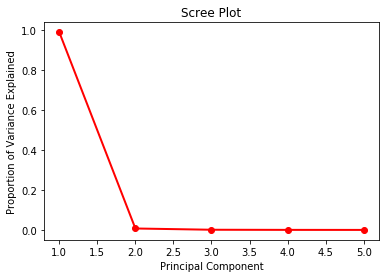

In [14]:
# Making the scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [15]:
# Each pricipal components also have 0 mean
pc_mean = np.mean(pca_X,axis=0)
print(pc_mean)

[1.33226763e-16 8.32667268e-18 6.93889390e-18 9.71445147e-18
 6.93889390e-18]


In [16]:
# Let's comfirm that we can also use SVD to obtain PCA
U,S,V = np.linalg.svd(X)

In [17]:
V

array([[ 0.44563655,  0.44890755,  0.44450167,  0.44833596,  0.44866827],
       [-0.63394479,  0.08219043,  0.74069083,  0.01943935, -0.20581042],
       [ 0.36118173,  0.15856436,  0.32097481, -0.86068123,  0.02465961],
       [ 0.50133428, -0.58288077,  0.35313756,  0.22079147, -0.48524112],
       [-0.13316816, -0.65332541,  0.1614447 , -0.09537261,  0.7212987 ]])

# PCR

In [18]:
# First standarize the data
from sklearn.preprocessing import StandardScaler
scaler_y = StandardScaler()
scaler_y.fit(np.array(target).reshape(-1,1))
y = scaler_y.transform(np.array(target).reshape(-1,1))

In [19]:
# create a data frame
df_pca = pd.DataFrame(pca_X,columns=['z_1','z_2','z_3','z_4','z_5'])
df_pca['y'] = y

In [20]:
df_pca.head()

,z_1,z_2,z_3,z_4,z_5,y
0,-2.239116,0.124378,0.020447,0.030278,0.024246,-1.099130
1,-2.138525,0.183820,0.040256,0.005125,-0.006229,-1.089794
2,-2.063345,0.172075,-0.022499,-0.005473,0.006452,-1.064473
3,-1.984537,0.139031,-0.079212,-0.017591,0.025476,-1.017565
4,-1.906969,0.146985,-0.039190,-0.023628,0.021831,-0.957660


In [21]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ z_1', data=df_pca).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1267.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           3.87e-18
Time:                        22:29:39   Log-Likelihood:                 14.303
No. Observations:                  20   AIC:                            -24.61
Df Residuals:                      18   BIC:                            -22.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.11e-16      0.028  -3.98e-15      1.000      -0.059       0.059
z_1            0.4461      0.013     35.596      0.000       0.420       0.472
==============================================================================
Omnibus:                        3.776   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                1.863
Skew:                           0.449   Prob(JB):                        0.394
Kurtosis:                       1.805   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ z_1 + z_2', data=df_pca).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1826.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.45e-20
Time:                        22:29:39   Log-Likelihood:                 25.366
No. Observations:                  20   AIC:                            -44.73
Df Residuals:                      17   BIC:                            -41.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.11e-16      0.017  -6.72e-15      1.000      -0.035       0.035
z_1            0.4461      0.007     60.147      0.000       0.430       0.462
z_2           -0.5025      0.086     -5.865      0.000      -0.683      -0.322
==============================================================================
Omnibus:                        4.252   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                1.705
Skew:                           0.325   Prob(JB):                        0.426
Kurtosis:                       1.726   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ z_1 + z_2 + z_3', data=df_pca).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1278.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.97e-19
Time:                        22:29:39   Log-Likelihood:                 26.450
No. Observations:                  20   AIC:                            -44.90
Df Residuals:                      16   BIC:                            -40.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.327e-17      0.016  -5.17e-15      1.000      -0.034       0.034
z_1            0.4461      0.007     61.601      0.000       0.431       0.462
z_2           -0.5025      0.084     -6.006      0.000      -0.680      -0.325
z_3           -0.2906      0.215     -1.353      0.195      -0.746       0.165
==============================================================================
Omnibus:                        4.280   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                1.540
Skew:                           0.201   Prob(JB):                        0.463
Kurtosis:                       1.701   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Partial Least Squares

In [24]:
from sklearn.cross_decomposition import PLSRegression

In [25]:
# First standarize the data
from sklearn.preprocessing import StandardScaler
scaler_x, scaler_y = StandardScaler(), StandardScaler()
scaler_x.fit(df_x)
scaler_y.fit(np.array(target).reshape(-1,1))
X = scaler_x.transform(df_x)
y = scaler_y.transform(np.array(target).reshape(-1,1))

In [26]:
# Fit PLS
pls = PLSRegression(n_components=5)
pls.fit(X, y)

PLSRegression(copy=True, max_iter=500, n_components=5, scale=True, tol=1e-06)

In [27]:
# Transform to PLS variables
pls_X = pls.transform(X)

In [28]:
# create a data frame
df_pls = pd.DataFrame(pls_X,columns=['z_1','z_2','z_3','z_4','z_5'])
df_pls['y'] = y

In [29]:
df_pls.head()

,z_1,z_2,z_3,z_4,z_5,y
0,-2.183385,0.122991,-0.025683,0.029531,0.017016,-1.099130
1,-2.085842,0.181683,-0.034748,-0.007235,0.006888,-1.089794
2,-2.012427,0.165066,0.022492,0.006254,-0.007424,-1.064473
3,-1.935307,0.128397,0.072408,0.025037,-0.025775,-1.017565
4,-1.859799,0.139450,0.035907,0.017454,-0.029984,-0.957660


In [30]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ z_1', data=df_pls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1280.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           3.54e-18
Time:                        22:29:39   Log-Likelihood:                 14.405
No. Observations:                  20   AIC:                            -24.81
Df Residuals:                      18   BIC:                            -22.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.11e-16      0.028     -4e-15      1.000      -0.058       0.058
z_1            0.4578      0.013     35.779      0.000       0.431       0.485
==============================================================================
Omnibus:                        3.749   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                1.864
Skew:                           0.452   Prob(JB):                        0.394
Kurtosis:                       1.808   Cond. No.                         2.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ z_1 + z_2', data=df_pls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1884.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.11e-20
Time:                        22:29:39   Log-Likelihood:                 25.677
No. Observations:                  20   AIC:                            -45.35
Df Residuals:                      17   BIC:                            -42.37
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.11e-16      0.016  -6.83e-15      1.000      -0.034       0.034
z_1            0.4578      0.007     61.095      0.000       0.442       0.474
z_2           -0.5174      0.087     -5.957      0.000      -0.701      -0.334
==============================================================================
Omnibus:                        4.156   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                1.672
Skew:                           0.315   Prob(JB):                        0.433
Kurtosis:                       1.731   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ z_1 + z_2 + z_3', data=df_pls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1292.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.72e-19
Time:                        22:29:39   Log-Likelihood:                 26.562
No. Observations:                  20   AIC:                            -45.12
Df Residuals:                      16   BIC:                            -41.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.327e-17      0.016  -5.19e-15      1.000      -0.034       0.034
z_1            0.4578      0.007     61.953      0.000       0.442       0.473
z_2           -0.5174      0.086     -6.040      0.000      -0.699      -0.336
z_3            0.2719      0.223      1.217      0.241      -0.202       0.746
==============================================================================
Omnibus:                        3.867   Durbin-Watson:                   1.314
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                1.482
Skew:                           0.206   Prob(JB):                        0.477
Kurtosis:                       1.732   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""